<h1 align="center" style="color: orange"> Probability </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Coin Flip

In [6]:
def coin_flip():
    return np.random.choice(['H', 'T'], p = [0.5, 0.5])

results = [coin_flip() for _ in range(10)]
print(f"10 Coin flips: {' '.join(results)}")

10 Coin flips: T T H H T T H H T T


### Rolling a fair 6-sided die

In [7]:
def empirical_probability(event_outcomes, sample_space):
    """
    Calculate probability using the classical definition
    
    Parameters:
    -----------
    event_outcomes : set or list
        Outcomes that constitute the event
    sample_space : set or list
        All possible outcomes
        
    Returns:
    --------
    float : probability value
    """
    return len(event_outcomes) / len(sample_space)

# Example: Die roll
sample_space = [1, 2, 3, 4, 5, 6]
event_even = [2, 4, 6]
event_greater_than_4 = [5, 6]

print(f"P(even) = {empirical_probability(event_even, sample_space):.3f}")
print(f"P(>4) = {empirical_probability(event_greater_than_4, sample_space):.3f}")

# Empirical probability from simulation
def simulate_probability(experiment_func, event_condition, n_trials=10000):
    """
    Estimate probability through simulation
    
    Parameters:
    -----------
    experiment_func : callable
        Function that performs one trial
    event_condition : callable
        Function that returns True if event occurred
    n_trials : int
        Number of simulation runs
    """
    successes = sum(1 for _ in range(n_trials) 
                    if event_condition(experiment_func()))
    return successes / n_trials

# Simulate die roll
def roll_die():
    return np.random.randint(1, 7)

# Estimate P(even number)
p_even_simulated = simulate_probability(
    roll_die, 
    lambda x: x % 2 == 0, 
    n_trials=100000
)
print(f"\nSimulated P(even) = {p_even_simulated:.4f}")

P(even) = 0.500
P(>4) = 0.333

Simulated P(even) = 0.4997


### Verify Kolmogorov's axioms hold for a probability distribution

In [8]:
def verify_axioms(outcomes, probabilities):
    """
    Verify Kolmogorov's axioms hold for a discrete probability distribution
    
    Parameters:
    -----------
    outcomes : list
        Possible outcomes (ignored for the probability check itself)
    probabilities : list
        Probability for each outcome (must be for mutually exclusive elementary events)
    """
    if len(outcomes) != len(probabilities):
        print("Error: The number of outcomes must match the number of probabilities.")
        return False
        
    probs = np.array(probabilities)
    
    # 1. Axiom 1: Non-negativity (P(A) >= 0)
    axiom1 = np.all(probs >= 0)
    print(f"Axiom 1 (Non-negativity): {axiom1}")
    
    # 2. Axiom 2: Normalization (P(Omega) = 1)
    sum_probs = np.sum(probs)
    axiom2 = np.isclose(sum_probs, 1.0)
    print(f"Axiom 2 (Normalization): {axiom2}, Sum = {sum_probs:.6f}")
    
    # 3. Axiom 3: Additivity (P(Union of Disjoint) = Sum of P)
    # For a complete set of elementary outcomes, this check is the same as Normalization.
    # It verifies that the sum of the probabilities of all disjoint elementary outcomes equals P(Omega) = 1.
    axiom3 = axiom2 # We reuse the result since the check is identical for elementary events
    print(f"Axiom 3 (Additivity for Elementary Events): {axiom3}")
    
    return axiom1 and axiom2


# Example 1: Fair die
die_outcomes = [1, 2, 3, 4, 5, 6]
die_probs = [1/6] * 6

print("Fair Die Distribution:")
is_valid = verify_axioms(die_outcomes, die_probs)
print(f"Valid probability distribution: {is_valid}\n")

# Example 2: Weighted classification
class_labels = ['negative', 'neutral', 'positive']
class_probs = [0.2, 0.5, 0.3]

print("Sentiment Classification Distribution:")
is_valid = verify_axioms(class_labels, class_probs)
print(f"Valid probability distribution: {is_valid}")

Fair Die Distribution:
Axiom 1 (Non-negativity): True
Axiom 2 (Normalization): True, Sum = 1.000000
Axiom 3 (Additivity for Elementary Events): True
Valid probability distribution: True

Sentiment Classification Distribution:
Axiom 1 (Non-negativity): True
Axiom 2 (Normalization): True, Sum = 1.000000
Axiom 3 (Additivity for Elementary Events): True
Valid probability distribution: True


### Multiplication rule in probability

In [10]:
def multiplication_rule(p_a, p_b_given_a):
    """
    Calculate P(A ∩ B) using multiplication rule
    
    Parameters:
    -----------
    p_a : float
        Probability of event A
    p_b_given_a : float
        Conditional probability of B given A
    """
    return p_a * p_b_given_a

# Example: Drawing cards without replacement
# A = first card is Ace, B = second card is Ace

p_first_ace = 4/52
p_second_ace_given_first = 3/51  # Only 3 aces left, 51 cards remaining

p_both_aces = multiplication_rule(p_first_ace, p_second_ace_given_first)
print(f"P(both cards are Aces) = {p_both_aces:.6f}")

# Verify with independent case (with replacement)
p_both_aces_independent = (4/52) * (4/52)
print(f"P(both Aces, with replacement) = {p_both_aces_independent:.6f}")

# Chain rule example: 3 events
def chain_rule(*conditional_probs):
    """
    Calculate joint probability using chain rule
    """
    result = 1.0
    for p in conditional_probs:
        result *= p
    return result

# Example: P(rain today AND rain tomorrow AND rain day after)
p_rain_today = 0.3
p_rain_tomorrow_given_today = 0.7  # More likely if it rained today
p_rain_day3_given_prev_two = 0.8   # Even more likely if rained 2 days

p_three_rainy_days = chain_rule(p_rain_today, 
                                 p_rain_tomorrow_given_today,
                                 p_rain_day3_given_prev_two)
print(f"\nP(3 consecutive rainy days) = {p_three_rainy_days:.4f}")

P(both cards are Aces) = 0.004525
P(both Aces, with replacement) = 0.005917

P(3 consecutive rainy days) = 0.1680


### Conditional Probability

In [11]:
def conditional_probability(p_a_and_b, p_b):
    """
    Calculate P(A|B) = P(A ∩ B) / P(B)
    
    Parameters:
    -----------
    p_a_and_b : float
        Joint probability P(A ∩ B)
    p_b : float
        Probability of event B
    """
    if p_b == 0:
        raise ValueError("Cannot condition on zero-probability event")
    return p_a_and_b / p_b

# Example: Medical diagnosis
# A = patient has disease, B = test result is positive

p_disease = 0.01  # 1% prevalence
p_positive_given_disease = 0.95  # 95% sensitivity (true positive rate)
p_positive_given_no_disease = 0.05  # 5% false positive rate

# Calculate P(test positive AND has disease)
p_positive_and_disease = p_disease * p_positive_given_disease

# Calculate P(test positive)
p_positive = (p_disease * p_positive_given_disease + 
              (1 - p_disease) * p_positive_given_no_disease)

# P(disease | positive test) - this is what we want!
p_disease_given_positive = conditional_probability(p_positive_and_disease, p_positive)

print(f"P(Disease | Positive Test) = {p_disease_given_positive:.4f}")
print(f"Despite 95% sensitivity, only {p_disease_given_positive:.1%} of positive tests indicate disease!")

P(Disease | Positive Test) = 0.1610
Despite 95% sensitivity, only 16.1% of positive tests indicate disease!


### Independence in Probability

In [15]:
def test_independence(p_a, p_b, p_a_and_b, tolerance=1e-6):
    """
    Test if events A and B are independent
    
    Parameters:
    -----------
    p_a : float
        P(A)
    p_b : float
        P(B)
    p_a_and_b : float
        P(A ∩ B)
    tolerance : float
        Numerical tolerance
    """
    expected_if_independent = p_a * p_b
    is_independent = abs(p_a_and_b - expected_if_independent) < tolerance
    
    print(f"P(A) = {p_a:.4f}")
    print(f"P(B) = {p_b:.4f}")
    print(f"P(A ∩ B) = {p_a_and_b:.4f}")
    print(f"P(A) × P(B) = {expected_if_independent:.4f}")
    print(f"Independent: {is_independent}")
    
    return is_independent

# Example 1: Two coin flips (independent)
print("Example 1: Two fair coin flips")
p_first_heads = 0.5
p_second_heads = 0.5
p_both_heads = 0.25

test_independence(p_first_heads, p_second_heads, p_both_heads)
print()

# Example 2: Cards without replacement (dependent)
print("Example 2: Drawing two aces without replacement")
p_first_ace = 4/52
p_second_ace = 4/52  # Marginal probability
p_both_aces = (4/52) * (3/51)

test_independence(p_first_ace, p_second_ace, p_both_aces)
print()

# Statistical test for independence from data
def chi_square_independence_test(contingency_table):
    """
    Test independence using chi-square test
    
    Parameters:
    -----------
    contingency_table : array-like
        2D array of observed frequencies
    """
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
    if p_value < 0.05:
        print("Reject independence (events are likely dependent)")
    else:
        print("Fail to reject independence")
    
    return p_value

# Example: Test if gender and product preference are independent
# Rows: Gender (M, F), Columns: Product (A, B)
observed = np.array([[30, 20],   # Males: 30 prefer A, 20 prefer B
                     [25, 25]])   # Females: 25 prefer A, 25 prefer B

print("Example 3: Gender and Product Preference")
print(chi_square_independence_test(observed))

Example 1: Two fair coin flips
P(A) = 0.5000
P(B) = 0.5000
P(A ∩ B) = 0.2500
P(A) × P(B) = 0.2500
Independent: True

Example 2: Drawing two aces without replacement
P(A) = 0.0769
P(B) = 0.0769
P(A ∩ B) = 0.0045
P(A) × P(B) = 0.0059
Independent: False

Example 3: Gender and Product Preference
Chi-square statistic: 0.6465
p-value: 0.4214
Degrees of freedom: 1
Fail to reject independence
0.4213795037428697


In [16]:
def test_independence(p_a: float, p_b: float, p_a_and_b: float, tolerance: float = 1e-6) -> bool:
    """
    Test if events A and B are independent using the definition: P(A ∩ B) = P(A) * P(B).
    
    Parameters:
    -----------
    p_a : float
        P(A)
    p_b : float
        P(B)
    p_a_and_b : float
        P(A ∩ B) - Joint probability
    tolerance : float
        Numerical tolerance for floating point comparison (default: 1e-6)
        
    Returns:
    --------
    bool: True if events are independent, False otherwise.
    """
    # Input Validation: Check for probability bounds
    if not (0 <= p_a <= 1 and 0 <= p_b <= 1 and 0 <= p_a_and_b <= 1):
        print("\nError: Input probabilities must be between 0 and 1.")
        return False
        
    expected_if_independent = p_a * p_b
    
    # Use np.isclose for robust float comparison
    is_independent = np.isclose(p_a_and_b, expected_if_independent, atol=tolerance)
    
    # Robust printing using formatted strings
    print(f"  P(A) = {p_a:.6f}")
    print(f"  P(B) = {p_b:.6f}")
    print(f"  P(A ∩ B) (Actual) = {p_a_and_b:.6f}")
    print(f"  P(A) × P(B) (Expected) = {expected_if_independent:.6f}")
    print(f"  Result: {'Independent' if is_independent else 'Dependent'}")
    
    return is_independent

# --- Example 1: Two fair coin flips (independent) ---
print("Example 1: Two fair coin flips")
p_first_heads = 0.5
p_second_heads = 0.5
p_both_heads = 0.25
test_independence(p_first_heads, p_second_heads, p_both_heads)
print("-" * 20)

# --- Example 2: Cards without replacement (dependent) ---
print("Example 2: Drawing two aces without replacement")
p_first_ace = 4/52
p_second_ace_marginal = 4/52 # P(B) - Marginal probability of the second card being an Ace.
p_both_aces = (4/52) * (3/51) # P(A ∩ B) = P(A) * P(B|A)

# Note: We compare P(A ∩ B) against P(A) * P(B), where P(B) is the marginal probability.
test_independence(p_first_ace, p_second_ace_marginal, p_both_aces)
print("-" * 20)


# --- Example 3: Statistical test for independence from data (Requires `scipy.stats`) ---

def chi_square_independence_test(contingency_table: np.ndarray, alpha: float = 0.05) -> float:
    """
    Test independence using chi-square test on a contingency table.
    
    Parameters:
    -----------
    contingency_table : array-like
        2D array of observed frequencies (using numpy for better integration).
    alpha : float
        Significance level (default: 0.05)
        
    Returns:
    --------
    float: The p-value of the test.
    """
    # Ensure input is a numpy array for consistent handling
    observed = np.asarray(contingency_table)
    
    # The stats.chi2_contingency function returns: chi2, p-value, dof, expected
    chi2, p_value, dof, expected = stats.chi2_contingency(observed)
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
    print("\n--- Hypothesis Test Result ---")
    if p_value < alpha:
        print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), Reject H₀.")
        print("Conclusion: Events are likely **dependent**.")
    else:
        print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), Fail to Reject H₀.")
        print("Conclusion: No sufficient evidence to conclude dependence.")
        
    return p_value

# Example: Test if gender and product preference are independent
# Rows: Gender (M, F), Columns: Product (A, B)
observed_data = [[30, 20],   # Males: 30 prefer A, 20 prefer B
                 [25, 25]]   # Females: 25 prefer A, 25 prefer B

print("Example 3: Gender and Product Preference (Chi-Square Test)")
chi_square_independence_test(observed_data)

Example 1: Two fair coin flips
  P(A) = 0.500000
  P(B) = 0.500000
  P(A ∩ B) (Actual) = 0.250000
  P(A) × P(B) (Expected) = 0.250000
  Result: Independent
--------------------
Example 2: Drawing two aces without replacement
  P(A) = 0.076923
  P(B) = 0.076923
  P(A ∩ B) (Actual) = 0.004525
  P(A) × P(B) (Expected) = 0.005917
  Result: Dependent
--------------------
Example 3: Gender and Product Preference (Chi-Square Test)

Chi-square statistic: 0.6465
p-value: 0.4214
Degrees of freedom: 1

--- Hypothesis Test Result ---
Since p-value (0.4214) >= alpha (0.05), Fail to Reject H₀.
Conclusion: No sufficient evidence to conclude dependence.


np.float64(0.4213795037428697)

In [17]:
# Naive Bayes example
def naive_bayes_probability(feature_probs_given_class, prior_class):
    """
    Calculate P(features | class) assuming conditional independence
    
    Parameters:
    -----------
    feature_probs_given_class : list
        [P(x1|y), P(x2|y), ..., P(xn|y)]
    prior_class : float
        P(y)
    """
    # Product of conditional probabilities
    likelihood = np.prod(feature_probs_given_class)
    # Joint probability
    joint = likelihood * prior_class
    return joint

# Example: Spam classification
# Features: [contains "free", contains "click", contains "!!!"]
# Class: spam

p_free_given_spam = 0.8
p_click_given_spam = 0.6
p_exclamation_given_spam = 0.9
p_spam = 0.3

features_given_spam = [p_free_given_spam, p_click_given_spam, p_exclamation_given_spam]

joint_spam = naive_bayes_probability(features_given_spam, p_spam)
print(f"P(features, spam) under independence assumption: {joint_spam:.6f}")

P(features, spam) under independence assumption: 0.129600


### Total Probability

In [18]:
def total_probability(conditional_probs, partition_probs):
    """
    Calculate P(A) using law of total probability
    
    Parameters:
    -----------
    conditional_probs : list
        [P(A|B1), P(A|B2), ..., P(A|Bn)]
    partition_probs : list
        [P(B1), P(B2), ..., P(Bn)]
    """
    if not np.isclose(sum(partition_probs), 1.0):
        raise ValueError("Partition probabilities must sum to 1")
    
    return sum(p_a_given_b * p_b 
               for p_a_given_b, p_b in zip(conditional_probs, partition_probs))

# Example: Factory quality control
# Three machines produce items: B1 (50%), B2 (30%), B3 (20%)
# Defect rates: B1 (1%), B2 (2%), B3 (3%)

machines_proportions = [0.50, 0.30, 0.20]
defect_rates = [0.01, 0.02, 0.03]

overall_defect_rate = total_probability(defect_rates, machines_proportions)
print(f"Overall defect rate: {overall_defect_rate:.4f} = {overall_defect_rate:.2%}")

# This is P(Defective) marginalized over which machine produced it

Overall defect rate: 0.0170 = 1.70%


In [ ]:
# Example of Probability calculation: Estimating click-through rate (CTR)
def estimate_ctr(clicks, impressions):
    """
    Estimate probability of click given impression
    
    In A/B testing:
    - Sample space: all ad impressions
    - Event: user clicks on ad
    - Probability: CTR
    """
    return clicks / impressions if impressions > 0 else 0

# Simulated campaign data
impressions = 10000
clicks = 250

ctr = estimate_ctr(clicks, impressions)
print(f"Estimated CTR: {ctr:.2%}")

# Confidence interval (using normal approximation)

# Standard error for proportion
se = np.sqrt(ctr * (1 - ctr) / impressions)
ci_95 = stats.norm.interval(0.95, loc=ctr, scale=se)
print(f"95% CI: [{ci_95[0]:.2%}, {ci_95[1]:.2%}]")

## Distributions

**Normal Distribution or Gaussian Distribution**



In [2]:
rng = np.random.default_rng()

# Parameters for the normal distribution
mean, std_dev = 0, 3

# Generate random observations from the normal distribution
observations = rng.normal(mean, std_dev, size=1000)

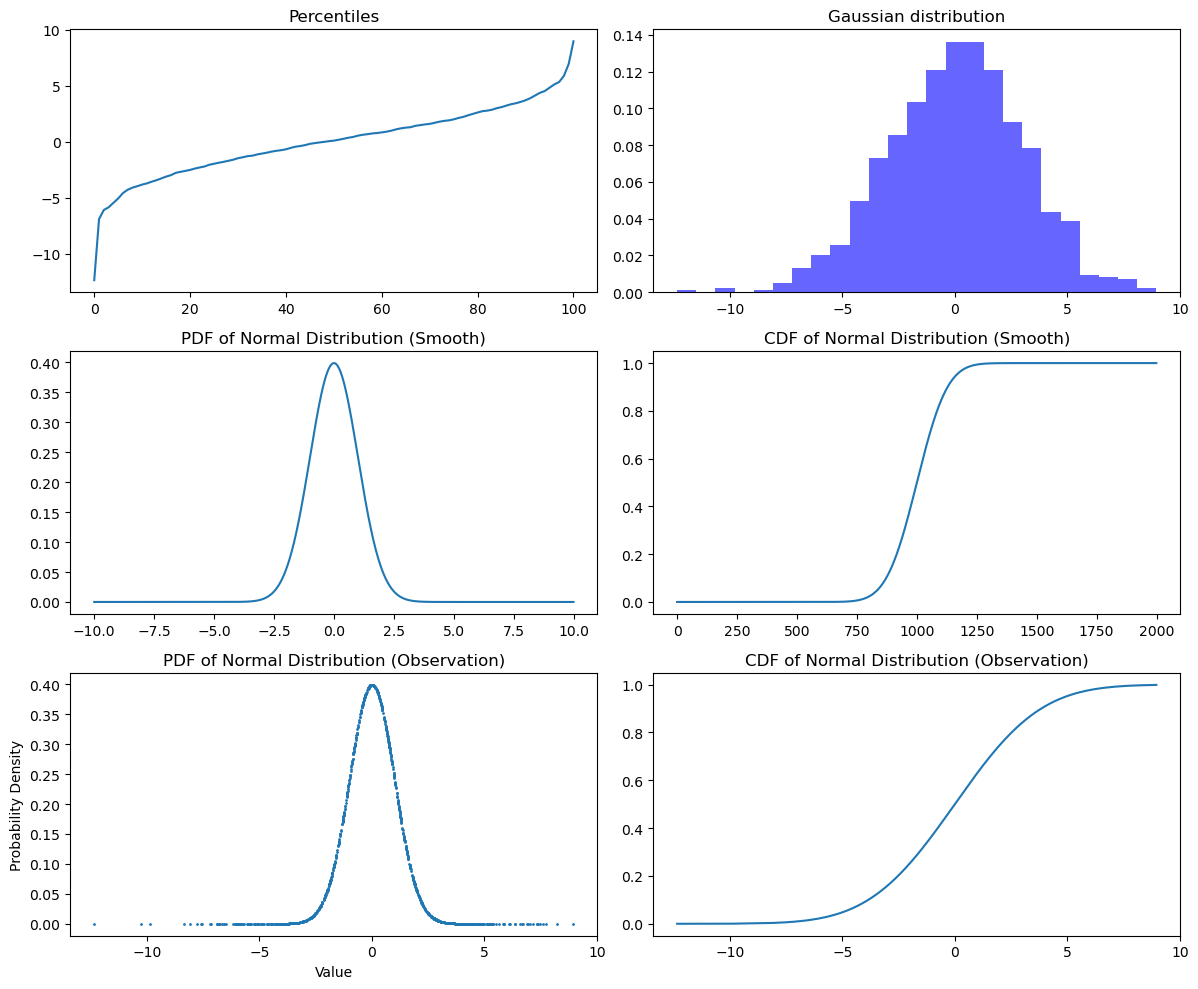

In [4]:
percentiles = np.percentile(observations, np.arange(0, 101))

# Calculate PDF (smoothened values)
data_points = np.arange(-10, 10, 0.01)
pdf = stats.norm.pdf(data_points)

# calculating CDF 
cdf = stats.norm.cdf(data_points)

# PDF and CDF of `observation`
pdf_observation = stats.norm.pdf(observations)

x = np.sort(observations)
cdf_observation = stats.norm.cdf(x, loc=mean, scale=std_dev)

# Plotting
# Percentiles
_, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(percentiles)
axes[0, 0].set_title('Percentiles')

# distribution using histogram
axes[0, 1].hist(observations, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title('Gaussian distribution')

# PDF 
axes[1, 0].plot(data_points, pdf)
axes[1, 0].set_title('PDF of Normal Distribution (Smooth)')

# CDF
axes[1, 1].plot(cdf)
axes[1, 1].set_title('CDF of Normal Distribution (Smooth)')

# PDF of `observations`
axes[2, 0].plot(observations, pdf_observation, 'o', markersize=1)
axes[2, 0].set_xlabel('Value')
axes[2, 0].set_ylabel('Probability Density')
axes[2, 0].set_title('PDF of Normal Distribution (Observation)')

# CDF of `observations`
axes[2, 1].plot(x, cdf_observation, markersize=1)
axes[2, 1].set_title('CDF of Normal Distribution (Observation)')

plt.tight_layout()
plt.show()

**Q-Q plot**

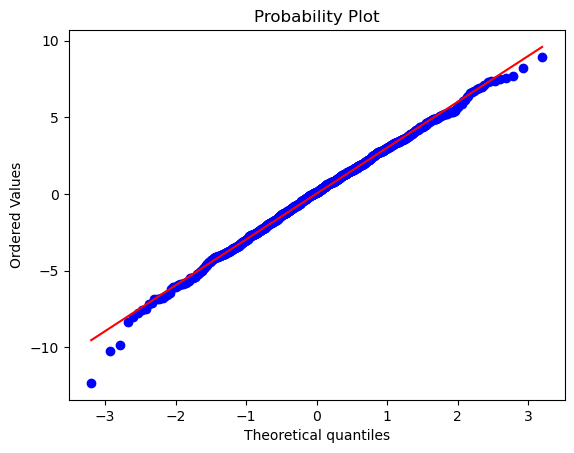

In [5]:
stats.probplot(observations, dist='norm', plot=plt)
plt.show()

**Student's t-distribution**

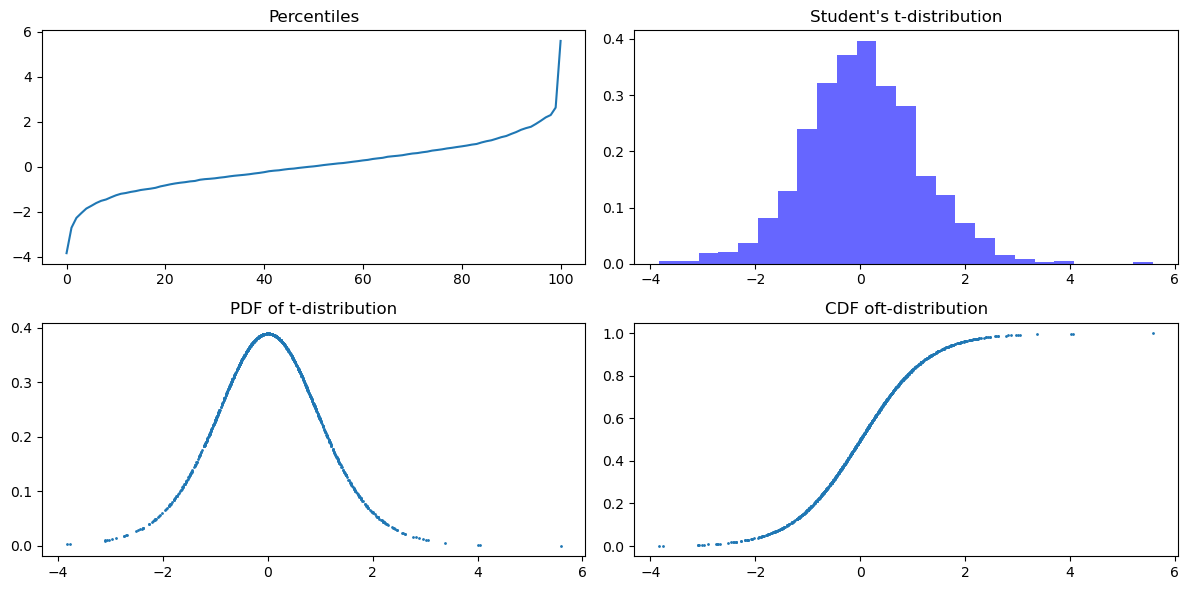

In [7]:
degree_of_freedom = 10
t_sample = rng.standard_t(degree_of_freedom, size=1000)
t_percentiles = np.percentile(t_sample, np.arange(0, 101))
t_pdf = stats.t.pdf(t_sample, degree_of_freedom)
x = np.sort(t_sample)
t_cdf = stats.t.cdf(t_sample, degree_of_freedom)


#plotting
_, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0, 0].plot(t_percentiles)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(t_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Student's t-distribution")

axes[1, 0].plot(t_sample, t_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of t-distribution')

axes[1, 1].plot(t_sample, t_cdf, 'o',  markersize=1)
axes[1, 1].set_title('CDF oft-distribution')

plt.tight_layout()
plt.show()

**Uniform Distribution**

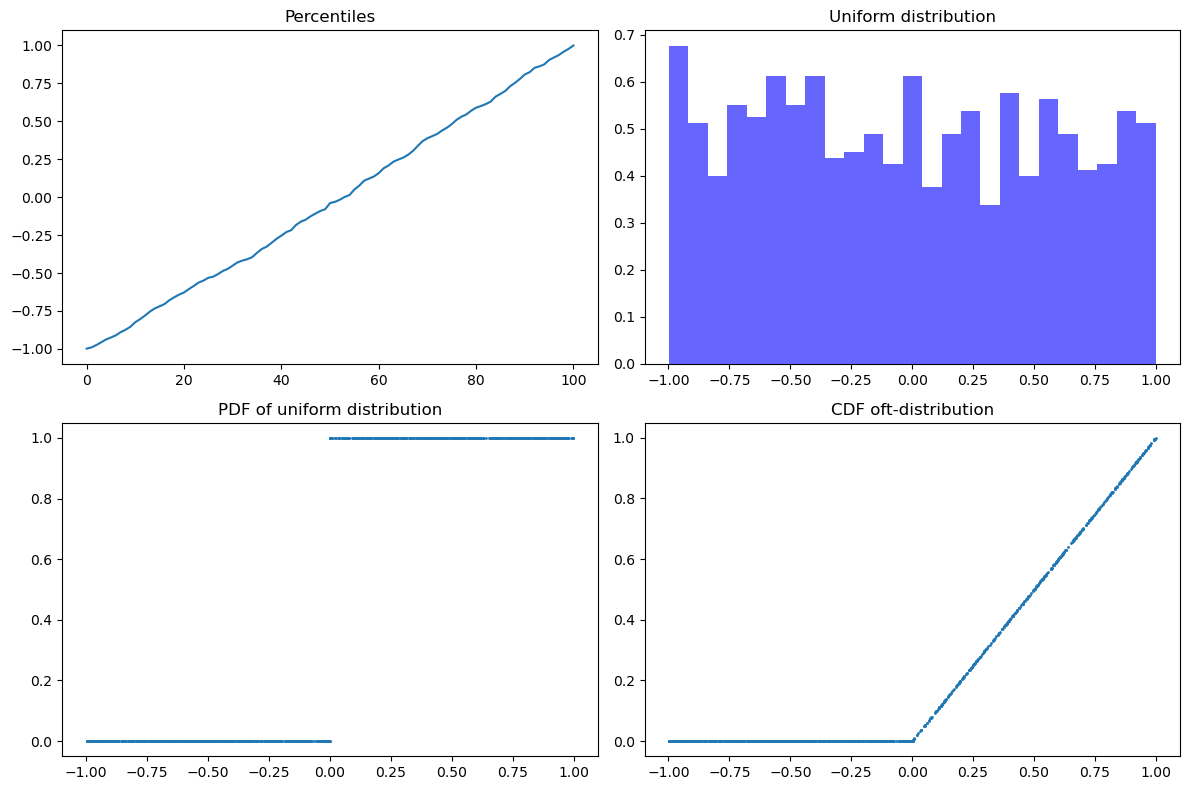

In [16]:
# Uniform distribution parameters
a = -1  # Lower bound
b = 1   # Upper bound

uniform_dist = rng.uniform(a, b, 1000)
percentiles_uniform = np.percentile(uniform_dist, np.arange(0, 101))
uniform_pdf = stats.uniform.pdf(uniform_dist)
uniform_cdf = stats.uniform.cdf(uniform_dist)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(percentiles_uniform)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(uniform_dist, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Uniform distribution")

axes[1, 0].plot(uniform_dist, uniform_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of uniform distribution')

axes[1, 1].plot(uniform_dist, uniform_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF oft-distribution')

plt.tight_layout()
plt.show()

**Chi-squared distribution**

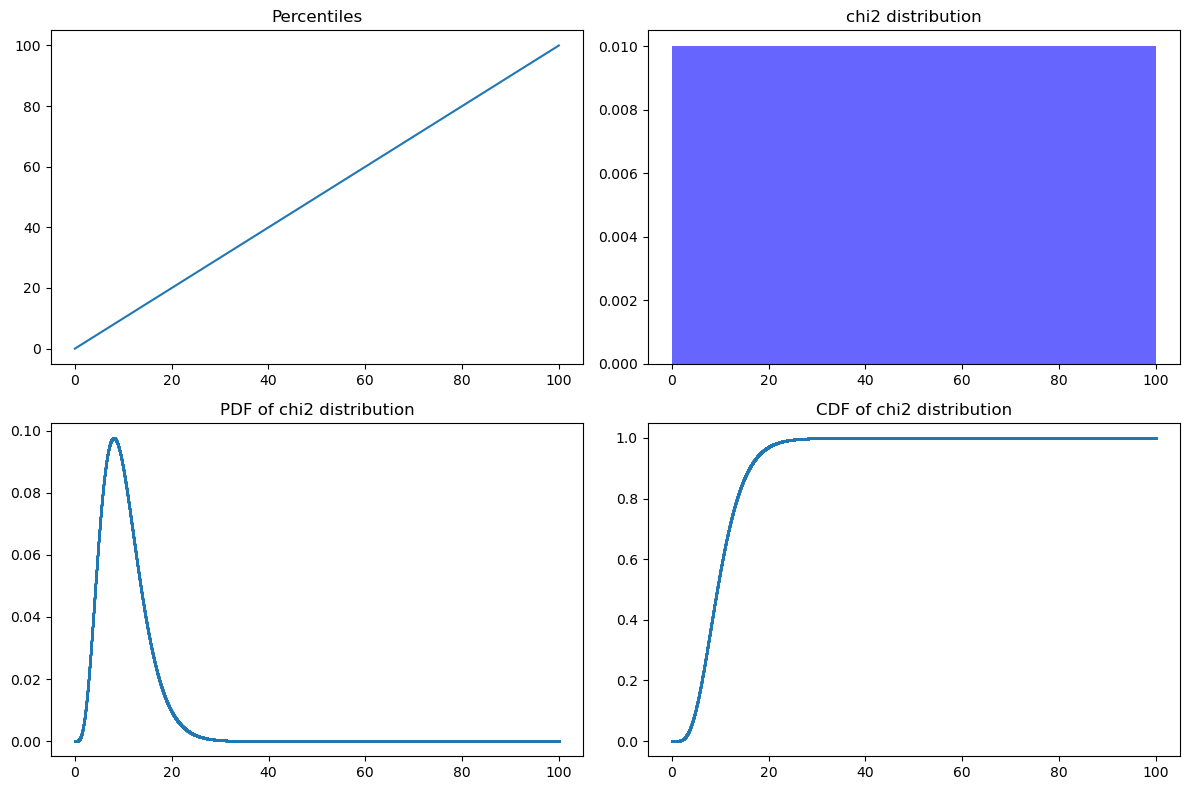

In [21]:
chi_sample = np.arange(0, 100, 0.01)
degree_of_freedom = 10

chi_percentile = np.percentile(chi_sample, np.arange(0, 101))
chi_pdf = stats.chi2.pdf(chi_sample, degree_of_freedom)
chi_cdf = stats.chi2.cdf(chi_sample, degree_of_freedom)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(chi_percentile)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(chi_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("chi2 distribution")

axes[1, 0].plot(chi_sample, chi_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of chi2 distribution')

axes[1, 1].plot(chi_sample, chi_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF of chi2 distribution')

plt.tight_layout()
plt.show()

**Binomial Distribution**

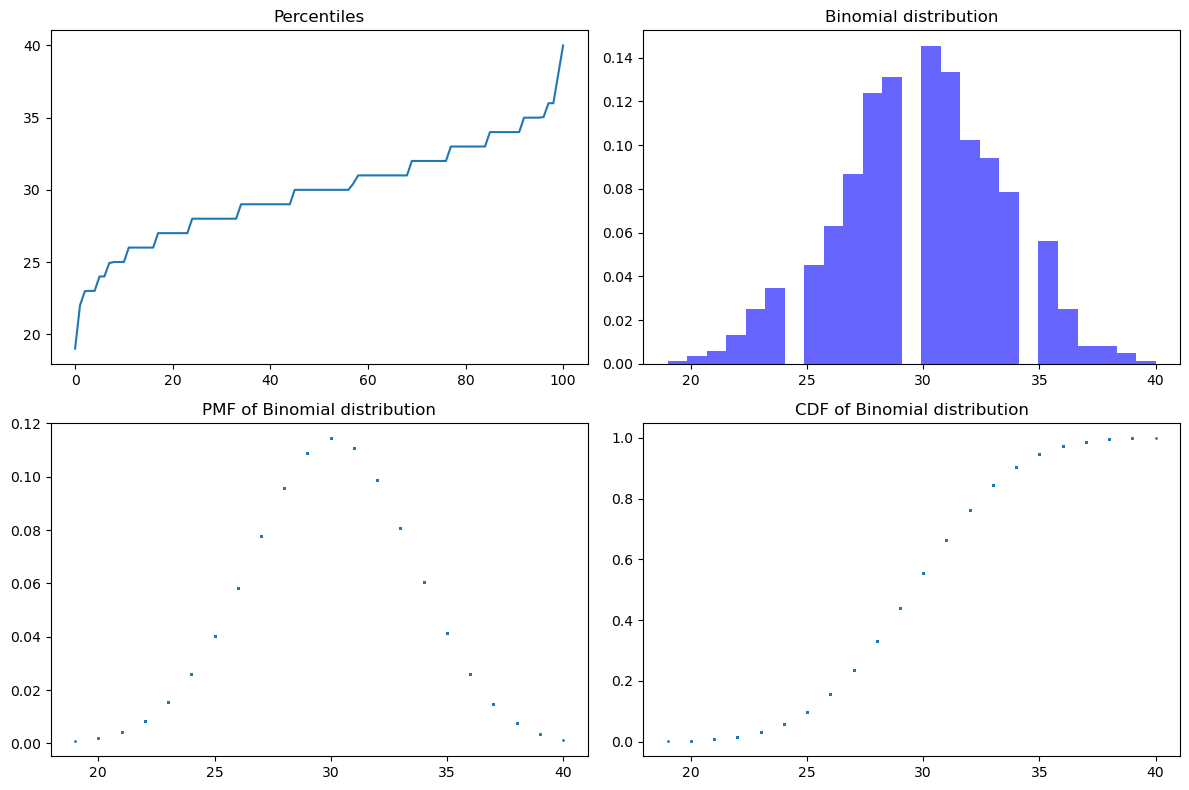

In [13]:
binomial_sample = rng.binomial(50, 0.6, 1000)

binomial_percentile = np.percentile(binomial_sample, np.arange(0, 101))
binomial_pmf = stats.binom.pmf( binomial_sample, 50, 0.6)
binomial_cdf = stats.binom.cdf(binomial_sample, 50, 0.6)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(binomial_percentile)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(binomial_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Binomial distribution")

axes[1, 0].plot(binomial_sample, binomial_pmf, 'o', markersize=1)
axes[1, 0].set_title('PMF of Binomial distribution')

axes[1, 1].plot(binomial_sample, binomial_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF of Binomial distribution')

plt.tight_layout()
plt.show()

**Box Cox Transformation**

$$\color{#F99417}Normal \rightarrow exponential \rightarrow  normal$$

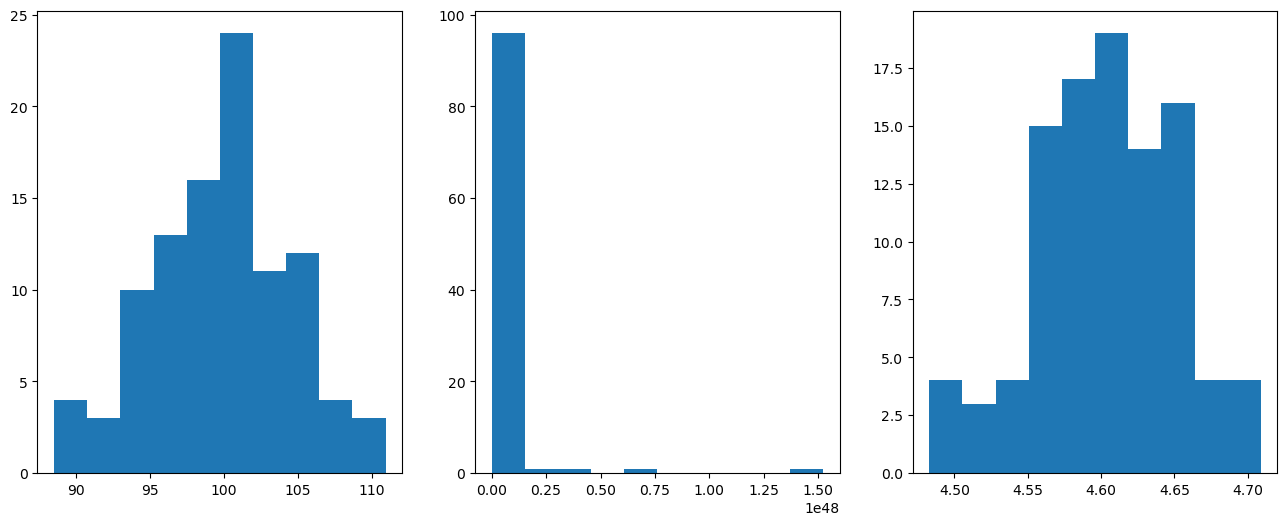

In [18]:
data = 5* np.random.randn(100) + 100

# exponential
exponential = np.exp(data)

# box-cox
res = stats.boxcox(data, 0)

_, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].hist(data)
axes[1].hist(exponential)
axes[2].hist(res)

plt.show()

## API's covered

- [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)


- [np.random.default_rng().normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) : Draw random samples from a normal (Gaussian) distribution (`numpy.random.Generator.normal`).

- [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)

- [numpy.median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)

- [numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)

- [numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

